In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
 
df= pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")

##**I'm just doing the same Data Preprocessing as I did in the 4th Assignment for this Dataset**

In [ ]:
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summe

In [ ]:
#Wrangling the dataset to deal with NULL values properly
df['has_urgency_banner']= pd.to_numeric(df.replace({'has_urgency_banner':{np.nan:0}})['has_urgency_banner'])

#Replacing NULL Values of Rating Count with Zero
df["rating_five_count"]= pd.to_numeric(df.replace({"rating_five_count":{np.nan:0}})["rating_five_count"])
df["rating_four_count"]= pd.to_numeric(df.replace({"rating_four_count":{np.nan:0}})["rating_four_count"])
df["rating_three_count"]= pd.to_numeric(df.replace({"rating_three_count":{np.nan:0}})["rating_three_count"])
df["rating_two_count"]= pd.to_numeric(df.replace({"rating_two_count":{np.nan:0}})["rating_two_count"])
df["rating_one_count"]= pd.to_numeric(df.replace({"rating_one_count":{np.nan:0}})["rating_one_count"])
df["rating_count"]= df["rating_count"].astype(float) #Convert to float

In [ ]:
#Wrangling the product_variation_size column to display Uniform Size Labels
df.iloc[765]["product_variation_size_id"]= "XL"
df.iloc[877]["product_variation_size_id"]= "S"
df.iloc[708:711]["product_variation_size_id"]= "S"

df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("Size", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("SIZE", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("size", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("Suit", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("-", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace(".", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace(".", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.strip()

df["product_variation_size_id"]= df.replace({"product_variation_size_id":{"One":1,"2XL":\
                             "XXL","XXXL":"3XL","XXXXL":"4XL","XXXXXL":"5XL"}})["product_variation_size_id"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

#**Q2)a)Finding out the Top 6 HIGHEST Rated Merchants**

In [ ]:
rating=df.groupby('merchant_title')['merchant_rating'].mean()
merchants=df.groupby('merchant_title')['merchant_rating'].mean().sort_values(ascending=False).index[0:6]
merchants

Index(['tutishop', 'shenzhen dcr technology co.,ltd', 'Unlimited retaliation',
       'langsengy', 'Beautiful Angel Fashion Store', 'ASKY1'],
      dtype='object', name='merchant_title')

In [ ]:
#So that instead of printing long labels, break the labels into NEW LINES!
merchant_labels=[label.replace(" ","\n") for label in merchants]

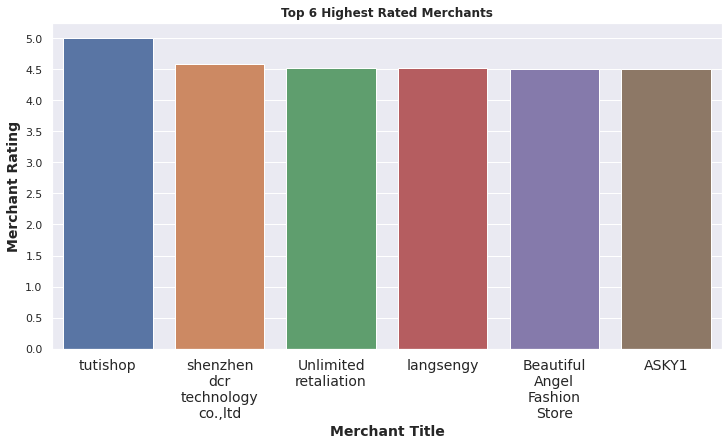

In [ ]:
plt.subplots(figsize=(12,6))
sns.barplot(merchant_labels, rating[merchants])
plt.xticks(size=14)
plt.yticks(list(np.arange(0,5.1,0.5)))
plt.xlabel("Merchant Title", size=14,fontweight='bold')
plt.ylabel("Merchant Rating", size=14,fontweight='bold')
plt.title("Top 6 Highest Rated Merchants",fontweight='bold')
plt.show();

#**Q2)b) Plotting Average Rating of Products of Each Country**

In [ ]:
rating_country=df.groupby('origin_country')['rating'].mean()
country= df.groupby('origin_country')['rating'].mean().index

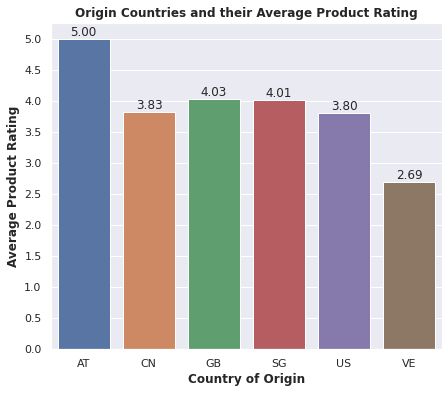

In [ ]:
fig, ax=plt.subplots(figsize=(7,6))
sns.barplot(country, rating_country)
plt.yticks(list(np.arange(0,5.1,0.5)))
plt.xlabel("Country of Origin", fontweight='bold')
plt.ylabel("Average Product Rating", fontweight='bold')
for i in range(len(country)):
    plt.text(x=ax.get_xticks()[i]-0.2, y=[p.get_height() for p in ax.patches][i]+0.05, s='%.2f'%rating_country[i], size=12)

plt.title("Origin Countries and their Average Product Rating", fontweight='bold')
plt.show();

#**Q2)c) Average Rating of Quality Products vs Non Quality Products**

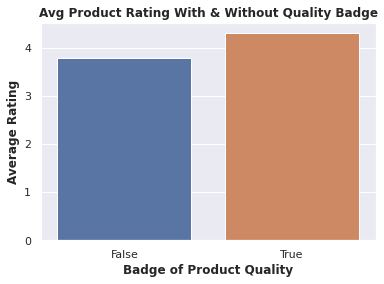

In [ ]:
df.groupby('badge_product_quality')['rating'].mean()
sns.barplot(df.groupby('badge_product_quality')['rating'].mean().index.astype(bool)\
       ,df.groupby('badge_product_quality')['rating'].mean())
plt.xlabel("Badge of Product Quality", weight='bold')
plt.ylabel("Average Rating", weight='bold')
plt.title("Avg Product Rating With & Without Quality Badge", weight='bold')
plt.show();

#**Q2)d)Plotting a Pie Chart of Number of each Star Count of Each Origin Country**

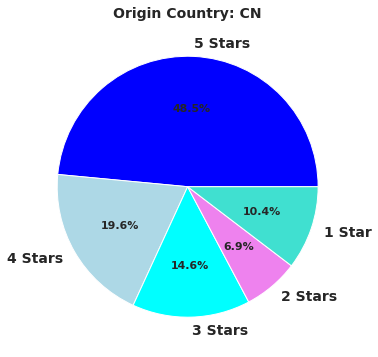

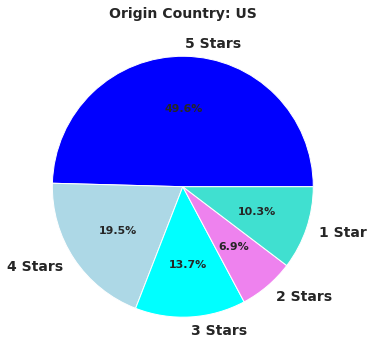

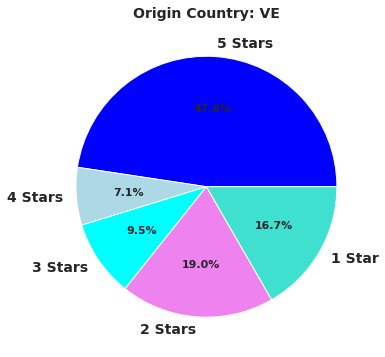

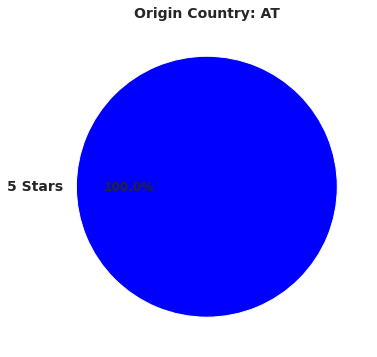

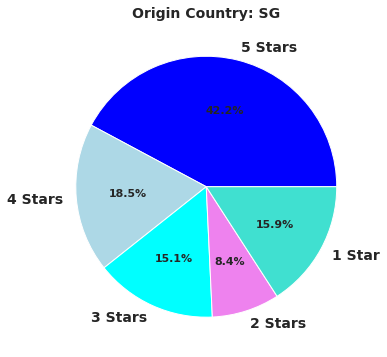

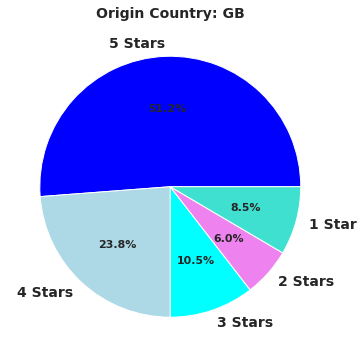

In [ ]:
colours=['blue','lightblue','cyan','violet','turquoise']

for country in df['origin_country'].dropna().unique():
    if(country=='AT'):
        plt.subplots(figsize=(6, 6))
        _,_,autopct=plt.pie([1,],labels=['5 Stars',],colors=['blue',], autopct='%1.1f%%'
                            ,textprops={'fontsize': 14,'fontweight':'bold'})
        plt.title("Origin Country: AT", fontweight='bold',fontsize=14)
        plt.setp(autopct, size=12, weight="bold")
        plt.show();
    
    else:
        num5=df[df['origin_country']==country]['rating_five_count'].sum()
        num4=df[df['origin_country']==country]['rating_four_count'].sum()
        num3=df[df['origin_country']==country]['rating_three_count'].sum()
        num2=df[df['origin_country']==country]['rating_two_count'].sum()
        num1=df[df['origin_country']==country]['rating_one_count'].sum()

        plt.subplots(figsize=(6, 6))
        _,_,autopct= plt.pie([num5,num4,num3,num2,num1], labels=['5 Stars','4 Stars','3 Stars','2 Stars'\
              ,'1 Star'], colors=colours, autopct='%1.1f%%',textprops={'fontsize': 14,'fontweight':'bold'})
        plt.setp(autopct, size=11, fontweight='bold')
        plt.title("Origin Country: "+str(country), fontweight= 'bold', fontsize=14)
        plt.show();

#**Q2)e) HeatMap of Units Sold by each Origin Country**

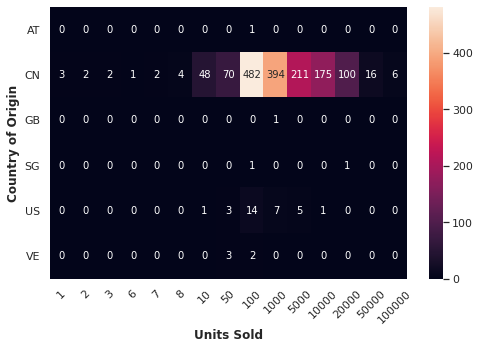

In [ ]:
plt.subplots(figsize=(8,5))
sns.heatmap(pd.crosstab(df['origin_country'],df['units_sold']), annot=True, fmt='d')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Units Sold", fontweight='bold')
plt.ylabel("Country of Origin",fontweight='bold')
plt.show();

#**Q2)f) Linear Regression Plot between 5Star Rating Counts and 4 Star Rating Counts**

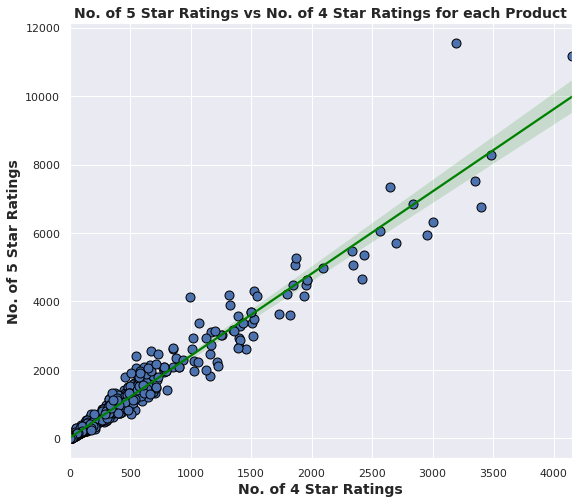

In [ ]:
plt.subplots(figsize=(9,8))
plt.plot(df['rating_four_count'],df['rating_five_count'],'o', mew=1,mec='black',ms=9)
sns.regplot(df['rating_four_count'],df['rating_five_count'], color='green')#, mew=1.5,mec='black',ms=8)
plt.xlabel("No. of 4 Star Ratings", size=14, fontweight='bold')
plt.ylabel("No. of 5 Star Ratings", size=14, fontweight='bold')
plt.title("No. of 5 Star Ratings vs No. of 4 Star Ratings for each Product", fontsize=14,
           fontweight='bold')
plt.show();

####Therefore we understand that as the number of 5 star rating count increases, the number of 4 star rating increases as well! In other words, they are positively correlated!

#**Q2)g)Linear Regression Plot between Product Rating and Fraction of 5 stars out of the total rating count**

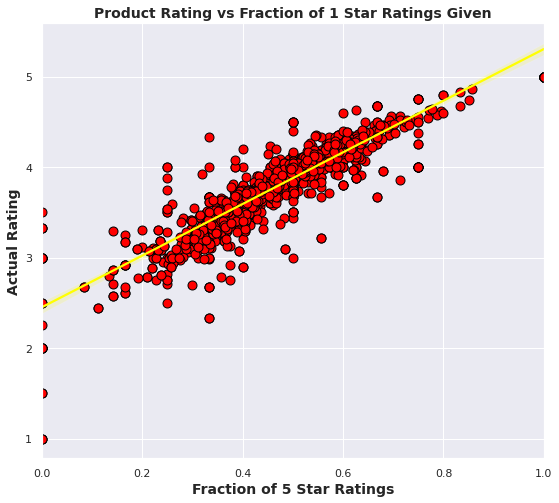

In [ ]:
plt.subplots(figsize=(9,8))
plt.plot(df['rating_five_count']/df['rating_count'],df['rating'],'o', mew=1,mec='black',ms=9, color='red')
sns.regplot(df['rating_five_count']/df['rating_count'],df['rating'], color='yellow')#, mew=1.5,mec='black',ms=8)
plt.xlabel("Fraction of 5 Star Ratings", size=14, fontweight='bold')
plt.ylabel("Actual Rating", size=14, fontweight='bold')
plt.title("Product Rating vs Fraction of 1 Star Ratings Given",fontsize=14, fontweight='bold')
plt.show();

####As expected, they are positively correlated i.e as the fraction of 5 Star ratings out of the total rating counts increases, the product ratings increase too!

#**Q2)h)Linear Regression Plot between Product Rating and Fraction of 1 stars out of the total rating count**

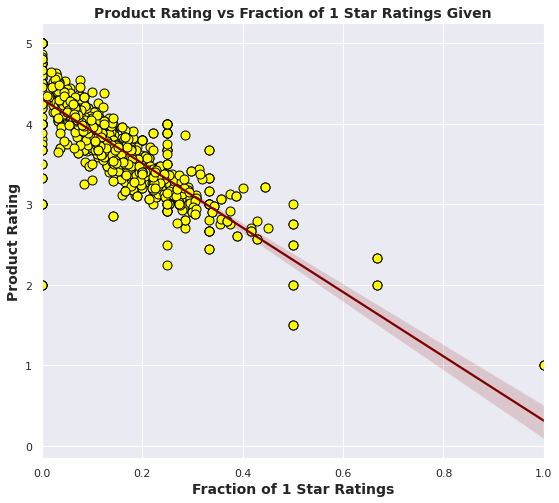

In [ ]:
plt.subplots(figsize=(9,8))
plt.plot(df['rating_one_count']/df['rating_count'],df['rating'],'o', mew=1,mec='black',ms=9, color='yellow')
sns.regplot(df['rating_one_count']/df['rating_count'],df['rating'], color='maroon')#, mew=1.5,mec='black',ms=8)
plt.xlabel("Fraction of 1 Star Ratings", size=14, fontweight='bold')
plt.ylabel("Product Rating",size=14, fontweight='bold')
plt.title("Product Rating vs Fraction of 1 Star Ratings Given",fontsize=14, fontweight='bold')
plt.show();

####As expected, they are negatively correlated i.e as the fraction of 1 Star ratings out of the total rating counts increases, the product ratings decrease!

#**Relative Portions of Top 7 Most Occurring Product Sizes**
###Sizes: XXS, XS, S, M, L, XL, XXL

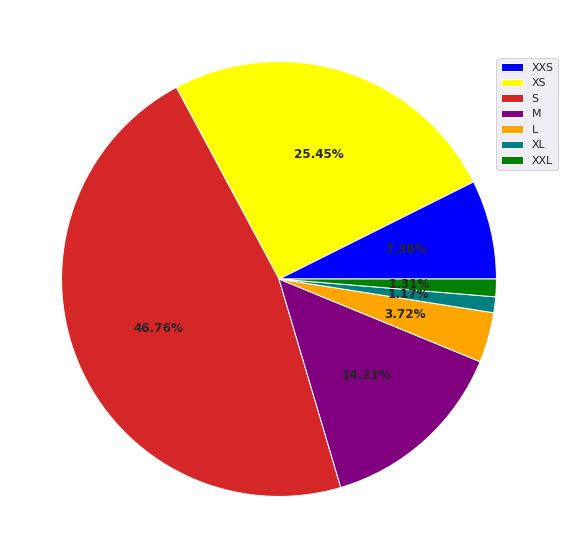

In [ ]:
colours=['blue','yellow','tab:red','purple','orange','teal','green']
plt.subplots(figsize=(10,10))
size_count=df['product_variation_size_id'].value_counts()[['XXS','XS','S','M','L','XL','XXL']]
size_labels=['XXS','XS','S','M','L','XL','XXL']

_,_,pctlabels=plt.pie(size_count,colors=colours, autopct='%.2f%%')
plt.setp(pctlabels, size=12, fontweight='bold')
plt.legend(size_labels, loc=(0.9,0.7))
plt.show();

####So as we can see most products have size S, followed by XS, then M, then XXS, then L, XL and XXL.